# Traffic Final Project

## CMSE 202

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from random import choice
import time
from IPython.display import display, clear_output
import math

## General Vehicle/Intersection Code

This code approach tracks and progresses the movement of vehicles using parametic equations. This way, instead of using imprecise velocity update equations, the vehicles will stay exactly on one path and all that has to be tracked is the distance along this path. It is important to note that the variable "t" is used NOT to represent time, but rather represents the distance the vehicle is along its path.

.5 = .5 in the x or y direction (middle of the road starting from the bottom), oriented up

-.5 = .5 in the x or y direction, oriented down

t-10 = go from left to right in the x or y direction

10-t = go from right to left in the x or y direction



In [13]:
'''Vehicle Path Equations'''

'''Inputs a single coordinate along a 
vehicle's path and returns parametrized 
x and y coordinates'''

# Straight Paths
def down_up(t):
    return .5, t-10

def left_right(t):
    return t-10, -.5

def up_down(t):
    return -.5, 10-t

def right_left(t):
    return 10-t, .5

# Right Turns
def down_right(t):
    if t <= 9:
        return .5, -10+t
    elif t < 9+np.pi/4:
        return 1 - .5*np.cos(2*t-18), -1 + .5*np.sin(2*t-18)
    else:
        return t-8-np.pi/4, -.5
    
def left_down(t):
    if t <= 9:
        return -10+t, -.5
    elif t < 9+np.pi/4:
        return -1 + .5*np.sin(2*t-18), -1 + .5*np.cos(2*t-18)
    else:
        return -.5, 8+np.pi/4-t
    
def up_left(t):
    if t <= 9:
        return -.5, 10-t
    elif t < 9+np.pi/4:
        return -1 + .5*np.cos(2*t-18), 1 - .5*np.sin(2*t-18)
    else:
        return 8+np.pi/4-t, .5
    
def right_up(t):
    if t <= 9:
        return 10-t, .5
    elif t < 9+np.pi/4:
        return 1 - .5*np.sin(2*t-18), 1 - .5*np.cos(2*t-18)
    else:
        return .5, t-8-np.pi/4
    
# Left Turns
def down_left(t):
    if t <= 9:
        return .5, -10+t
    elif t < 9+3*np.pi/4:
        return -1 + 1.5*np.cos(2*(t-9)/3), -1 + 1.5*np.sin(2*(t-9)/3)
    else:
        return 8+3*np.pi/4 - t, .5
    
def left_up(t):
    if t <= 9:
        return -10+t, -.5
    elif t < 9+3*np.pi/4:
        return -1 + 1.5*np.sin(2*(t-9)/3), 1 - 1.5*np.cos(2*(t-9)/3)
    else:
        return .5, t-8-3*np.pi/4
    
def up_right(t):
    if t <= 9:
        return -.5, 10-t
    elif t < 9+3*np.pi/4:
        return 1 - 1.5*np.cos(2*(t-9)/3), 1 - 1.5*np.sin(2*(t-9)/3)
    else:
        return -8-3*np.pi/4 + t, -.5
    
def right_down(t):
    if t <= 9:
        return 10-t, .5
    elif t < 9+3*np.pi/4:
        return 1 - 1.5*np.sin(2*(t-9)/3), -1 + 1.5*np.cos(2*(t-9)/3)
    else:
        return -.5, -t+8+3*np.pi/4
    

### Vehicle Class:

#### Attributes:
1. t - float: distance along the path
2. stop - boolean: if True, the vehicle will choose to stop when approaching an intersection (handled by Intersection Class)
3. maxspeed - float: top speed vehicle will travel out during simulation (units per timestep)
4. speed - float: current speed of vehicle (units per timestep)
5. destination - string: location the vehicle is heading to ("up", "right", "down", "left")
6. equation - function: parameterized path equation of vehicle
7. position - tuple: x and y coordinates of vehicle


In [20]:
class Vehicle():
    '''General vehicle class'''
    
    def __init__(self, maxspeed=.1, loc='down', dest='right', random=False):
        '''
           Defines the vehicle
        
           maxspeed - float : maximum speed the car will travel
           loc - string : location the vehicle will spawn
           dest - string : location the vehicle will travel to
           random - boolean: whether or not the vehicle will be assigned random
                             loc and dest or if the parameters will be used.
        '''
        self.t = 0   
        self.stop = True
        if random:
            # randomly selects spawn location and destination
            options = ["up", "right", "down", "left"]
            location = choice(options)
            options.remove(location) 
            self.destination = choice(options)
            self.equation = eval(location+"_"+self.destination) # assigns appriopriate path equation 
            self.position = self.equation(0)
            self.maxspeed = maxspeed + np.random.randn()*.02 # adds random variation based on normal distribution
            self.speed = self.maxspeed 

        else:
            self.maxspeed = maxspeed
            self.speed = maxspeed
            self.destination = dest
            self.equation = eval(loc+"_"+dest)
            self.position = self.equation(0)

    def move(self):
        '''Updates position and t based on speed'''
        self.t += self.speed
        self.position = self.equation(self.t)
    
    def set_pos(self, pos):
        '''Sets position of vehicle'''
        self.position = pos
        
    def get_pos(self):
        '''Gets position of vehicle'''
        return self.position
    
    def set_t(self, t):
        '''Sets t of vehicle'''
        self.t = t
        
    def get_t(self):
        '''Gets t of vehicle'''
        return self.t
    
    def set_stop(self, stop):
        '''Sets stop value of vehicle'''
        self.stop = stop
        
    def get_stop(self):
        '''Gets stop value of vehicle'''
        return self.stop
    
    def set_speed(self, s):
        '''Sets speed of vehicle'''
        self.speed = s
        
    def get_speed(self):
        '''Gets speed of vehicle'''
        return self.speed
    
    def set_maxspeed(self, s):
        '''Sets max speed of vehicle'''
        self.maxspeed = s
        
    def get_maxspeed(self):
        '''Gets max speed of vehicle'''
        return self.maxspeed
    
    def set_dest(self, dest):
        '''Sets destination of vehicle'''
        self.destination = dest
    
    def get_dest(self):
        '''Gets destination of vehicle'''
        return self.destination
    
    def get_loc(self):
        '''Returns part of the intersection the vehicle is in'''
        x, y = self.position 
        if y > 1:
            return ('up', 0)
        elif x > 1:
            return ('right', 1)
        elif y < -1:
            return ('down', 2)
        elif x < -1:
            return ('left', 3)
        else:
            return ('center', 4)

### Intersection Class:

#### Attributes:
1. vehicles - list of vehicles objs: holds all vehicles current in intersection

In [30]:
class Intersection():
    '''General intersection class'''
    
    def __init__(self, n=0):
        '''Defines the intersection'''
        self.vehicles = []
        for i in range(n):
            self.vehicles.append(Vehicle(random=True))
            
    def add_vehicle(self, vehicle):
        '''Adds one vehicle to the intersection'''
        self.vehicles.append(vehicle)
        
    def add(self, vehicle):
        '''Adds one vehicle to the intersection'''
        self.vehicles.append(vehicle)
        
    def get_vehicles(self):
        '''Returns list of vehicles'''
        return self.vehicles
    
    def show(self):
        '''Graphs a static visual of the intersection, roads, and vehicles'''
        
        # draws road
        plt.gca().add_patch(plt.Rectangle((-10,-1), 20, 2, fc='grey'))
        plt.gca().add_patch(plt.Rectangle((-1,-10), 2, 20, fc='grey'))
        
        plt.gca().add_patch(plt.Rectangle((-10,-10), 9, 9, fc='green', ec='black'))
        plt.gca().add_patch(plt.Rectangle((1,-10), 9, 9, fc='green', ec='black'))
        plt.gca().add_patch(plt.Rectangle((-10,1), 9, 9, fc='green', ec='black'))
        plt.gca().add_patch(plt.Rectangle((1,1), 9, 9, fc='green', ec='black'))
        
        plt.gca().add_patch(plt.Rectangle((-9,-.0625), 1.5, .125, fc='yellow'))
        plt.gca().add_patch(plt.Rectangle((-5,-.0625), 1.5, .125, fc='yellow'))
        
        plt.gca().add_patch(plt.Rectangle((7.5,-.0625), 1.5, .125, fc='yellow'))
        plt.gca().add_patch(plt.Rectangle((3.5,-.0625), 1.5, .125, fc='yellow'))
        
        plt.gca().add_patch(plt.Rectangle((-.0625, -9), .125, 1.5, fc='yellow'))
        plt.gca().add_patch(plt.Rectangle((-.0625, -5), .125, 1.5, fc='yellow'))
        
        plt.gca().add_patch(plt.Rectangle((-.0625, 7.5), .125, 1.5, fc='yellow'))
        plt.gca().add_patch(plt.Rectangle((-.0625, 3.5), .125, 1.5, fc='yellow'))
        
        # draws vehicles
        for v in self.vehicles:
            x,y = v.get_pos()
            plt.plot(x, y, 'rs', markersize=15, markeredgecolor='black') 
        
        # limits plot to 20x20 area
        plt.xlim([-10, 10])
        plt.ylim([-10, 10])
        
        # removes tick marks
        plt.tick_params(axis='both', which='both',
                bottom=False, top=False, left=False, right=False,
                labelbottom=False, labelleft=False)
    
    def timestep(self):
        '''Advances the vehicles generally for all intersections'''
        for v in self.vehicles:
            v.move()
            if v.get_t() > 22:
                self.vehicles.remove(v)
    
    def animate(self, n=1):
        '''Loops over timesteps while displaying snapshots'''
        fig = plt.figure(figsize=(10,10))
        
        for i in range(n):
            
            # displays
            self.show()
#             time.sleep(0.01)
            clear_output(wait=True)
            display(fig)
            fig.clear()
            
            # advances simulation
            self.timestep()
            
        plt.close()
    
    def simulate(self, n=500, spawn_chance=.02):
        '''simulates traffic using animate while spawning vehicles'''
        for i in range(n):
            if rd.random() < spawn_chance:
                self.add(Vehicle(random=True))
            self.animate()
            
        

## Stop Sign

In [27]:
class Stopsign(Intersection):    
    '''Subclass of Intersection that carries behavior of the 4-way stop'''
    
    def __init__(self, n=0):
        '''Defines Stopsign object'''
        super().__init__(n)
        self.busy = False
        
    def show(self):
        super().show()
        plt.gca().add_patch(plt.Rectangle((2.45, 1), .1, 1, fc='black'))
        plt.gca().add_patch(plt.Polygon(
            np.array([[2.293,2], [2,2.293], [2,2.707], [2.293, 3], [2.707, 3], [3,2.707], [3,2.293], [2.707, 2]]), 
            closed=True, fc='red', ec='black'))
        
    
    def timestep(self):
        '''Includes unique behavior of 4-way stop'''
        if self.busy == True:
            self.busy = "inter"
        elif self.busy == "inter":
            self.busy = False

        for v in self.vehicles:

            pos = v.get_pos()
            t = v.get_t()
            speed = v.get_speed()
            maxspeed = v.get_maxspeed()

            # braking for stop sign
            if t > 6.5 and t < 8.2:
                v.set_speed((8.5-t)*maxspeed/2)
                
            # stopped or accelerating
            elif t >= 8.2 and t < 11.6:
                if speed == 0 and self.busy == False:
                    v.set_stop(False)
                if v.get_stop():
                    v.set_speed(0)
                else:
                    self.busy = True
                    v.set_speed((t-7.1)*maxspeed/4.5)
            
            # max speed driving
            elif t >= 11.6 or t <= 6.5:
                v.set_speed(maxspeed)
                        
            # braking for vehicle
            others = self.vehicles[:]
            others.remove(v)
            for c in others:
                # if on same axis, close together, and behind the other vehicle, slow down
                if (c.get_pos()[0]==pos[0] or c.get_pos()[1]==pos[1]) and (math.dist(c.get_pos(),pos)<2) and (t<c.get_t()):
                    new_speed = (math.dist(c.get_pos(),pos)-1)*maxspeed
                    if new_speed < v.get_speed():
                        v.set_speed(new_speed)
            
            v.move()
            
            if t > 22:
                self.vehicles.remove(v)
                     
            

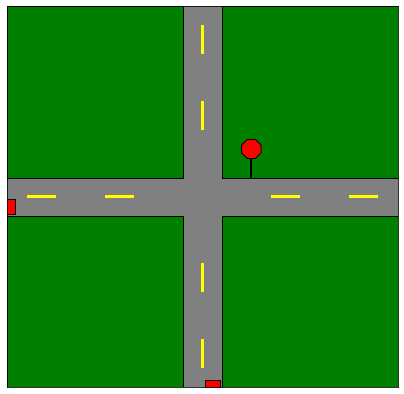

In [28]:
# Show image
road = Stopsign(3)
plt.figure(figsize=(7,7))
road.show()

KeyboardInterrupt: 

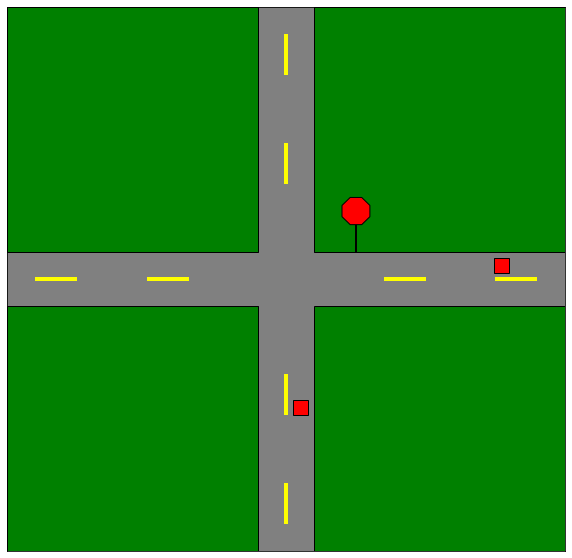

In [29]:
# Simulate two cars
road = Stopsign()
road.add_vehicle(Vehicle(maxspeed=.1, loc='down', dest='left', random=False))
road.animate(30)
road.add_vehicle(Vehicle(maxspeed=.1, loc='right', dest='up', random=False))
road.animate(260)

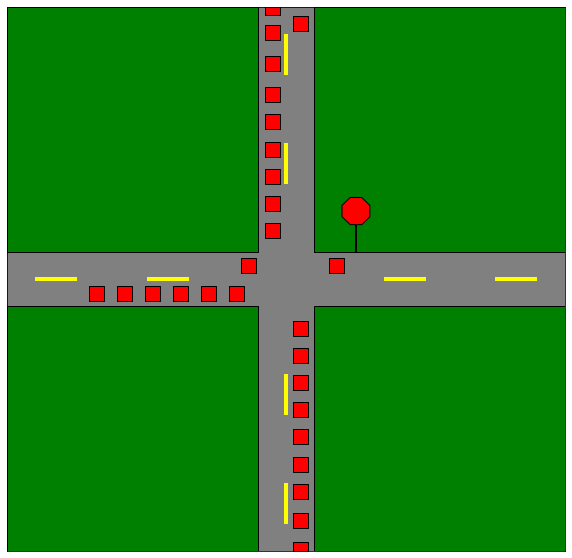

KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

In [22]:
# Simulate traffic
road = Stopsign()
road.simulate(n=1500, spawn_chance=.05)

# Stoplight

Need to do:
1. Add yellow light mechanic
2. Add left turn behavior
3. Fix turn acceleration


In [31]:
class Stoplight(Intersection):    
    '''Subclass of Intersection that carries behavior of the stoplight'''
    
    def __init__(self, n=0, cycle_time=100, cur_time=0):
        '''Defines Stoplight object'''
        super().__init__(n)
        self.light = [1, 0, 1, 0]
        self.cycle_time = cycle_time
        self.cur_time = cur_time
    
    def show(self):
        super().show()
        colors = ['red', 'lime']
        plt.gca().add_patch(plt.Circle((-1.7, 3), .5, fc=colors[self.light[0]]))
        plt.gca().add_patch(plt.Circle((3, 1.7), .5, fc=colors[self.light[1]]))
        plt.gca().add_patch(plt.Circle((1.7, -3), .5, fc=colors[self.light[2]]))
        plt.gca().add_patch(plt.Circle((-3, -1.7), .5, fc=colors[self.light[3]]))

    def timestep(self):
        '''Includes unique behavior of stoplight'''
        # update stoplight
        if self.cycle_time-self.cur_time == 0:
            self.light = [abs(i-1) for i in self.light]
            self.cur_time -= self.cycle_time-1
        else:
            self.cur_time += 1
        
        # update vehicles 
        for v in self.vehicles:

            loc = v.get_loc()
            pos = v.get_pos()
            t = v.get_t()
            speed = v.get_speed()
            maxspeed = v.get_maxspeed()
            
            # brake zone
            if t > 6.5 and t < 8.2:
                # braking for red light
                if self.light[loc[1]] == 0:
                    v.set_speed((8.5-t)*maxspeed/2)
                
            # accelerating from stop
            elif (t >= 8.2 and t < 11.6) and speed<maxspeed:
                if speed == 0 and self.light[loc[1]] == 1:
                    v.set_stop(False)
                if v.get_stop():
                    v.set_speed(0)
                else:
                    v.set_speed((t-7.1)*maxspeed/4.5)
            
            # max speed driving
            elif t >= 11.6 or t <= 6.5:
                v.set_speed(maxspeed)
                        
            # braking for vehicle
            others = self.vehicles[:]
            others.remove(v)
            for c in others:
                # if on same axis, close together, and behind the other vehicle, slow down
                if (c.get_pos()[0]==pos[0] or c.get_pos()[1]==pos[1]) and (math.dist(c.get_pos(),pos)<2) and (t<c.get_t()):
                    new_speed = (math.dist(c.get_pos(),pos)-1)*maxspeed
                    if new_speed < v.get_speed():
                        v.set_speed(new_speed)
            
            v.move()
            
            if t > 22:
                self.vehicles.remove(v)

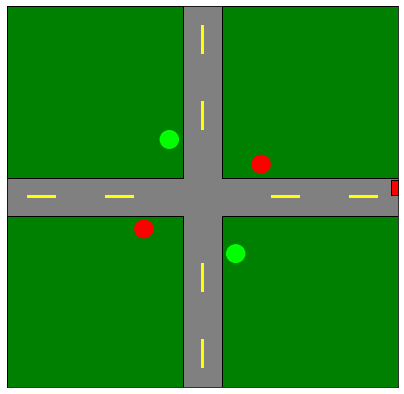

In [10]:
# Show image
road = Stoplight(1)
plt.figure(figsize=(7,7))
road.show()

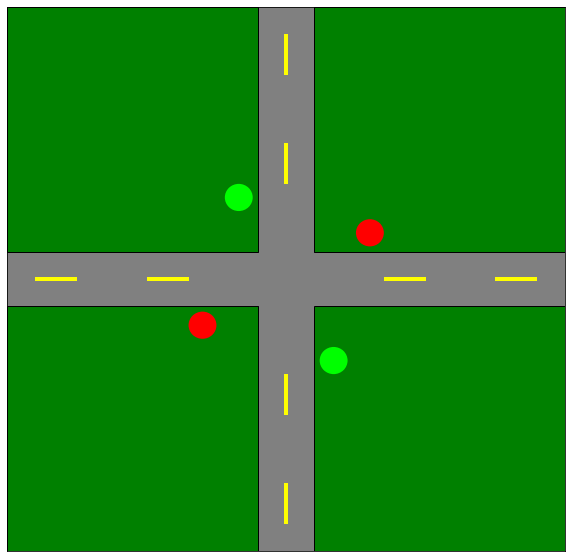

In [11]:
# Simulate two cars
road = Stoplight()
road.add_vehicle(Vehicle(maxspeed=.1, loc='down', dest='left', random=False))
road.animate(30)
road.add_vehicle(Vehicle(maxspeed=.1, loc='right', dest='up', random=False))
road.animate(260)

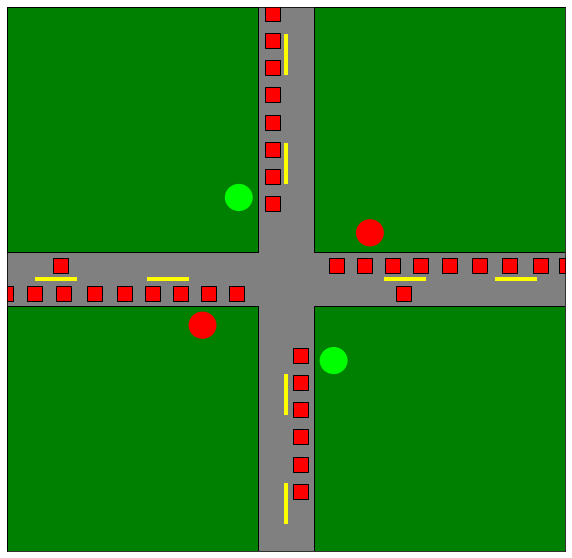

In [12]:
# Simulate traffic
road = Stoplight()
road.simulate(n=1500, spawn_chance=.05)